# ID5059 Coursework 2 - Group

In [5]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [54]:
# if used locally:

file_path_test = 'data/test.csv'
df_test = pd.read_csv(file_path_test)

file_path_train = 'data/train.csv'
df_train = pd.read_csv(file_path_train)

df_train.head(5)

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

# Data Exploration

In [7]:
# Make a copy of the training set:

df_train_copy = df_train

In [8]:
# Inspect the data set - how many rows and columns do we have?

df_train_copy.shape

# We have got 7,905 rows and 20 columns

(7905, 20)

In [9]:
# Inspect the data set - are there null values? / which data types do the attributes have?

df_train_copy.info()

# All features have 7,905 non-null values, i.e., there are no missing values.
# Some features are categorical (Drug, Sex, Ascites, Heptomegaly, Spoders, Edema, Status), 
# some features are numerical (N_Days, Age, Bilirubin, CHolesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Stage, Prothrombin).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [10]:
# Inspect the data set - how many distinct values do we have per attribute?

df_train_copy.nunique()

# id has 7905 distinct values, so this is a unique identifier which we will not further explore.

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

### Inspect Label

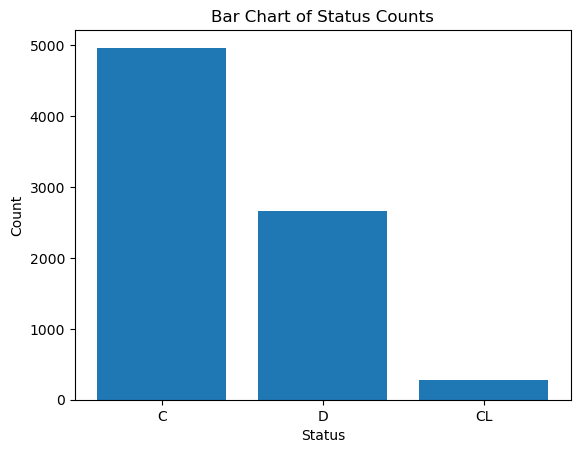

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64


In [11]:
# Inspecting our label "Status"

status_counts = df_train_copy['Status'].value_counts()

plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Bar Chart of Status Counts')
plt.show()

status_counts = df_train_copy['Status'].value_counts()
status_counts.columns = ['Status', 'Count']
print(status_counts)

# We can see that there are 3 different categories, C, D, and CL, so we have a multiclassification problem.
# We can also see that there is a huge imbalance between classes with 4965 observations in status "C", 2665 observations in status "D", 
# and only 275 observations in status "CL".

In [12]:
# Encode labels for further processing

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

categorical_cols = df_train_copy[['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']]
numeric_cols = ['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

encoded_categorical_cols = pd.DataFrame()

for col in categorical_cols.columns:
    encoded_categorical_cols[col] = labelencoder.fit_transform(categorical_cols[col])

df_train_copy_processed = pd.concat([df_train_copy[numeric_cols].reset_index(drop=True), encoded_categorical_cols], axis=1)

### Histograms and Correlation Matrix

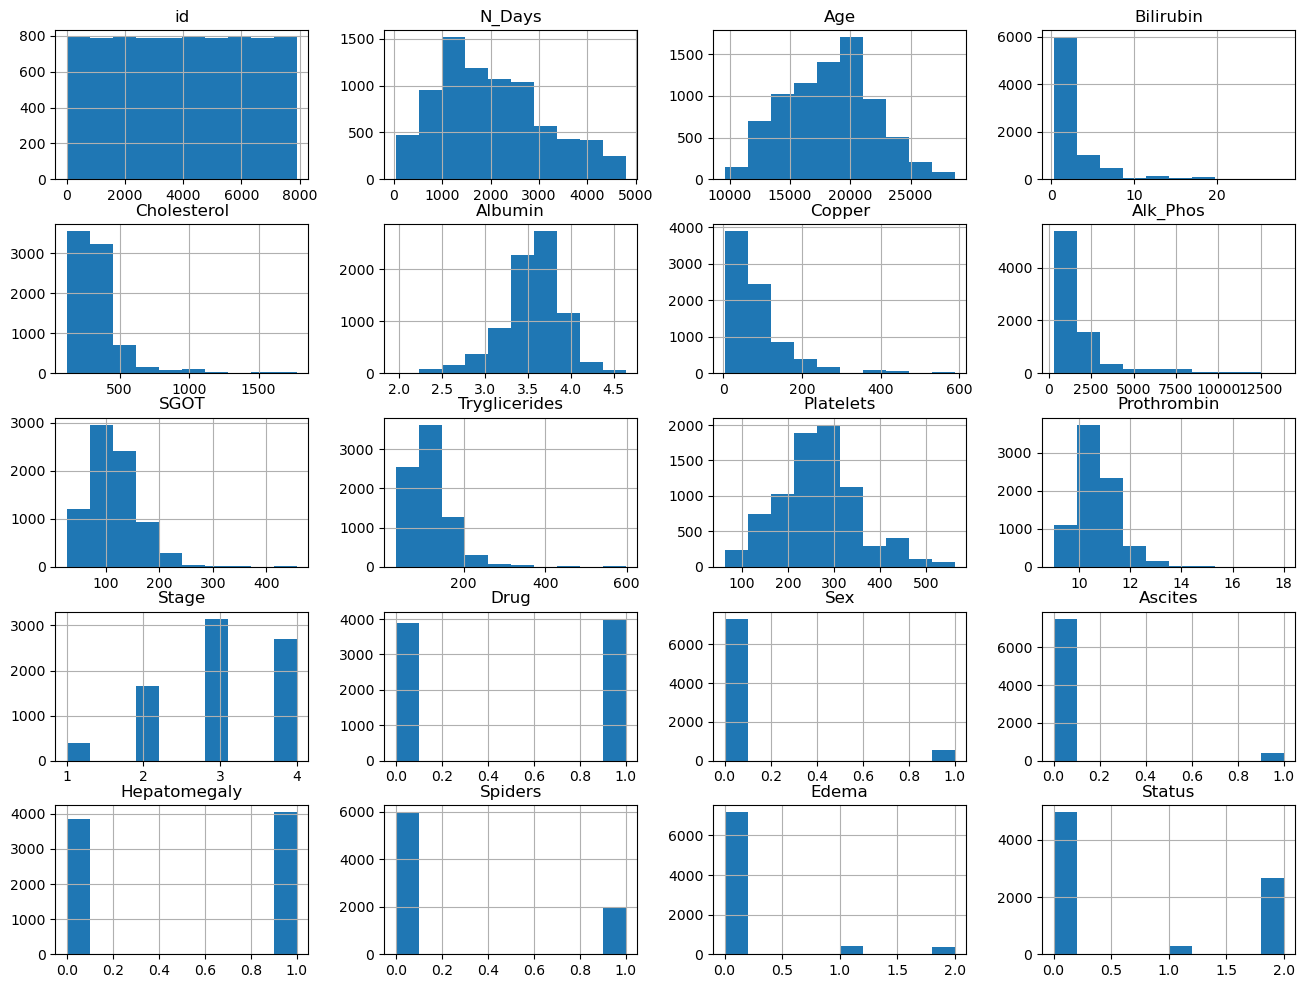

In [13]:
# Histograms of all features to see their distributions
df_train_copy_processed.hist(figsize=(16, 12));

# different distributions:
# most continuous attributes have tails in their distribution
# most categorical attributes are not balanced, as is our label "Status"
# age is measured in days which is more accurate than measuring it in years, however, it will probably be easier to deal with in the model by grouping age values together

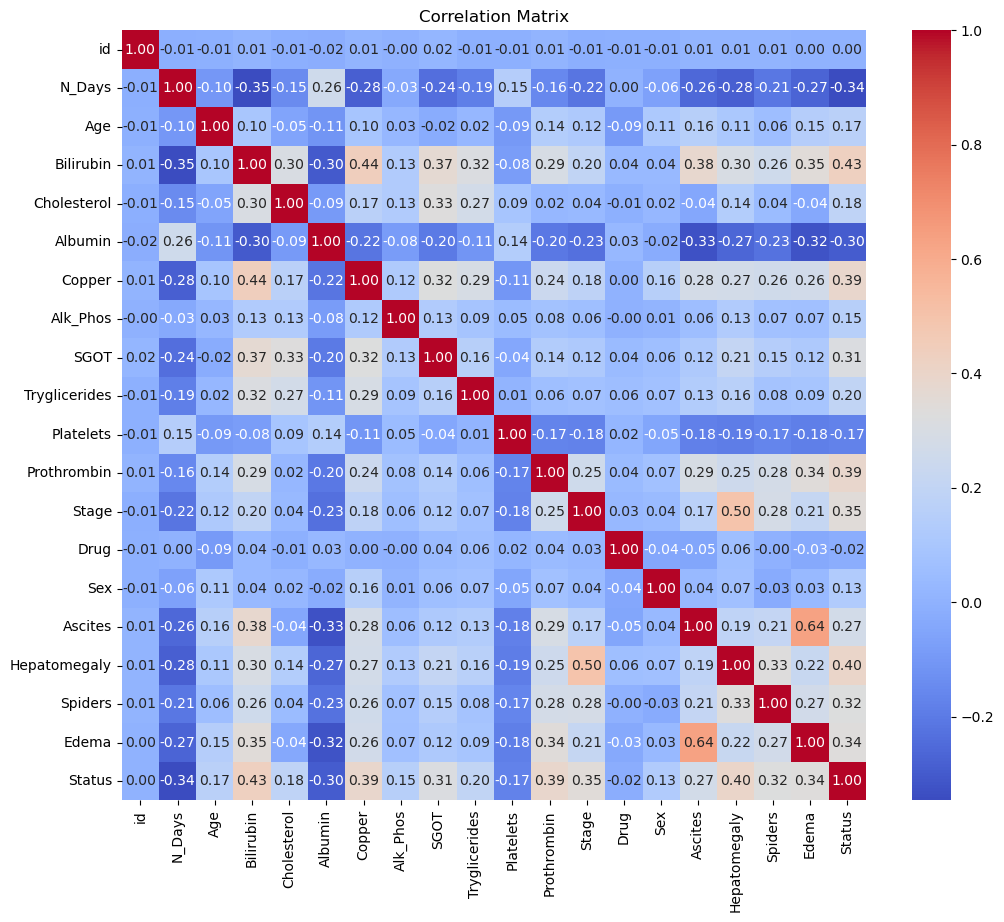

In [14]:
# Correlation matrix to identify linear correlations

correlation_matrix = df_train_copy_processed.corr()

plt.figure(figsize = (12, 10))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.show()

### Correlation Matrix Findings

The strongest linear correlations found between a feature and the status label can be observed for:
* Bilirubin (0.43)
* Heptatomegagly (0.40)
* Copper (0.39)
* Prothrombin (0.39)
* Stage (0.35)
* Edema (0.34)
* N_days (-0.34)

The strongest linear correlations found between two features can be observed for:
* Ascites and Edema (0.64)
* Stage and Hepatomegaly (0.50)
* Bilirubin and Copper (0.44)
* Bilirubin and Ascites (0.38)
* Bilirubin and Alk_phos (0.37)
* Bilirubin and Edema (0.35)
* N_days and Bilirubin (-0.35)

Overall, no strong linear correlations.

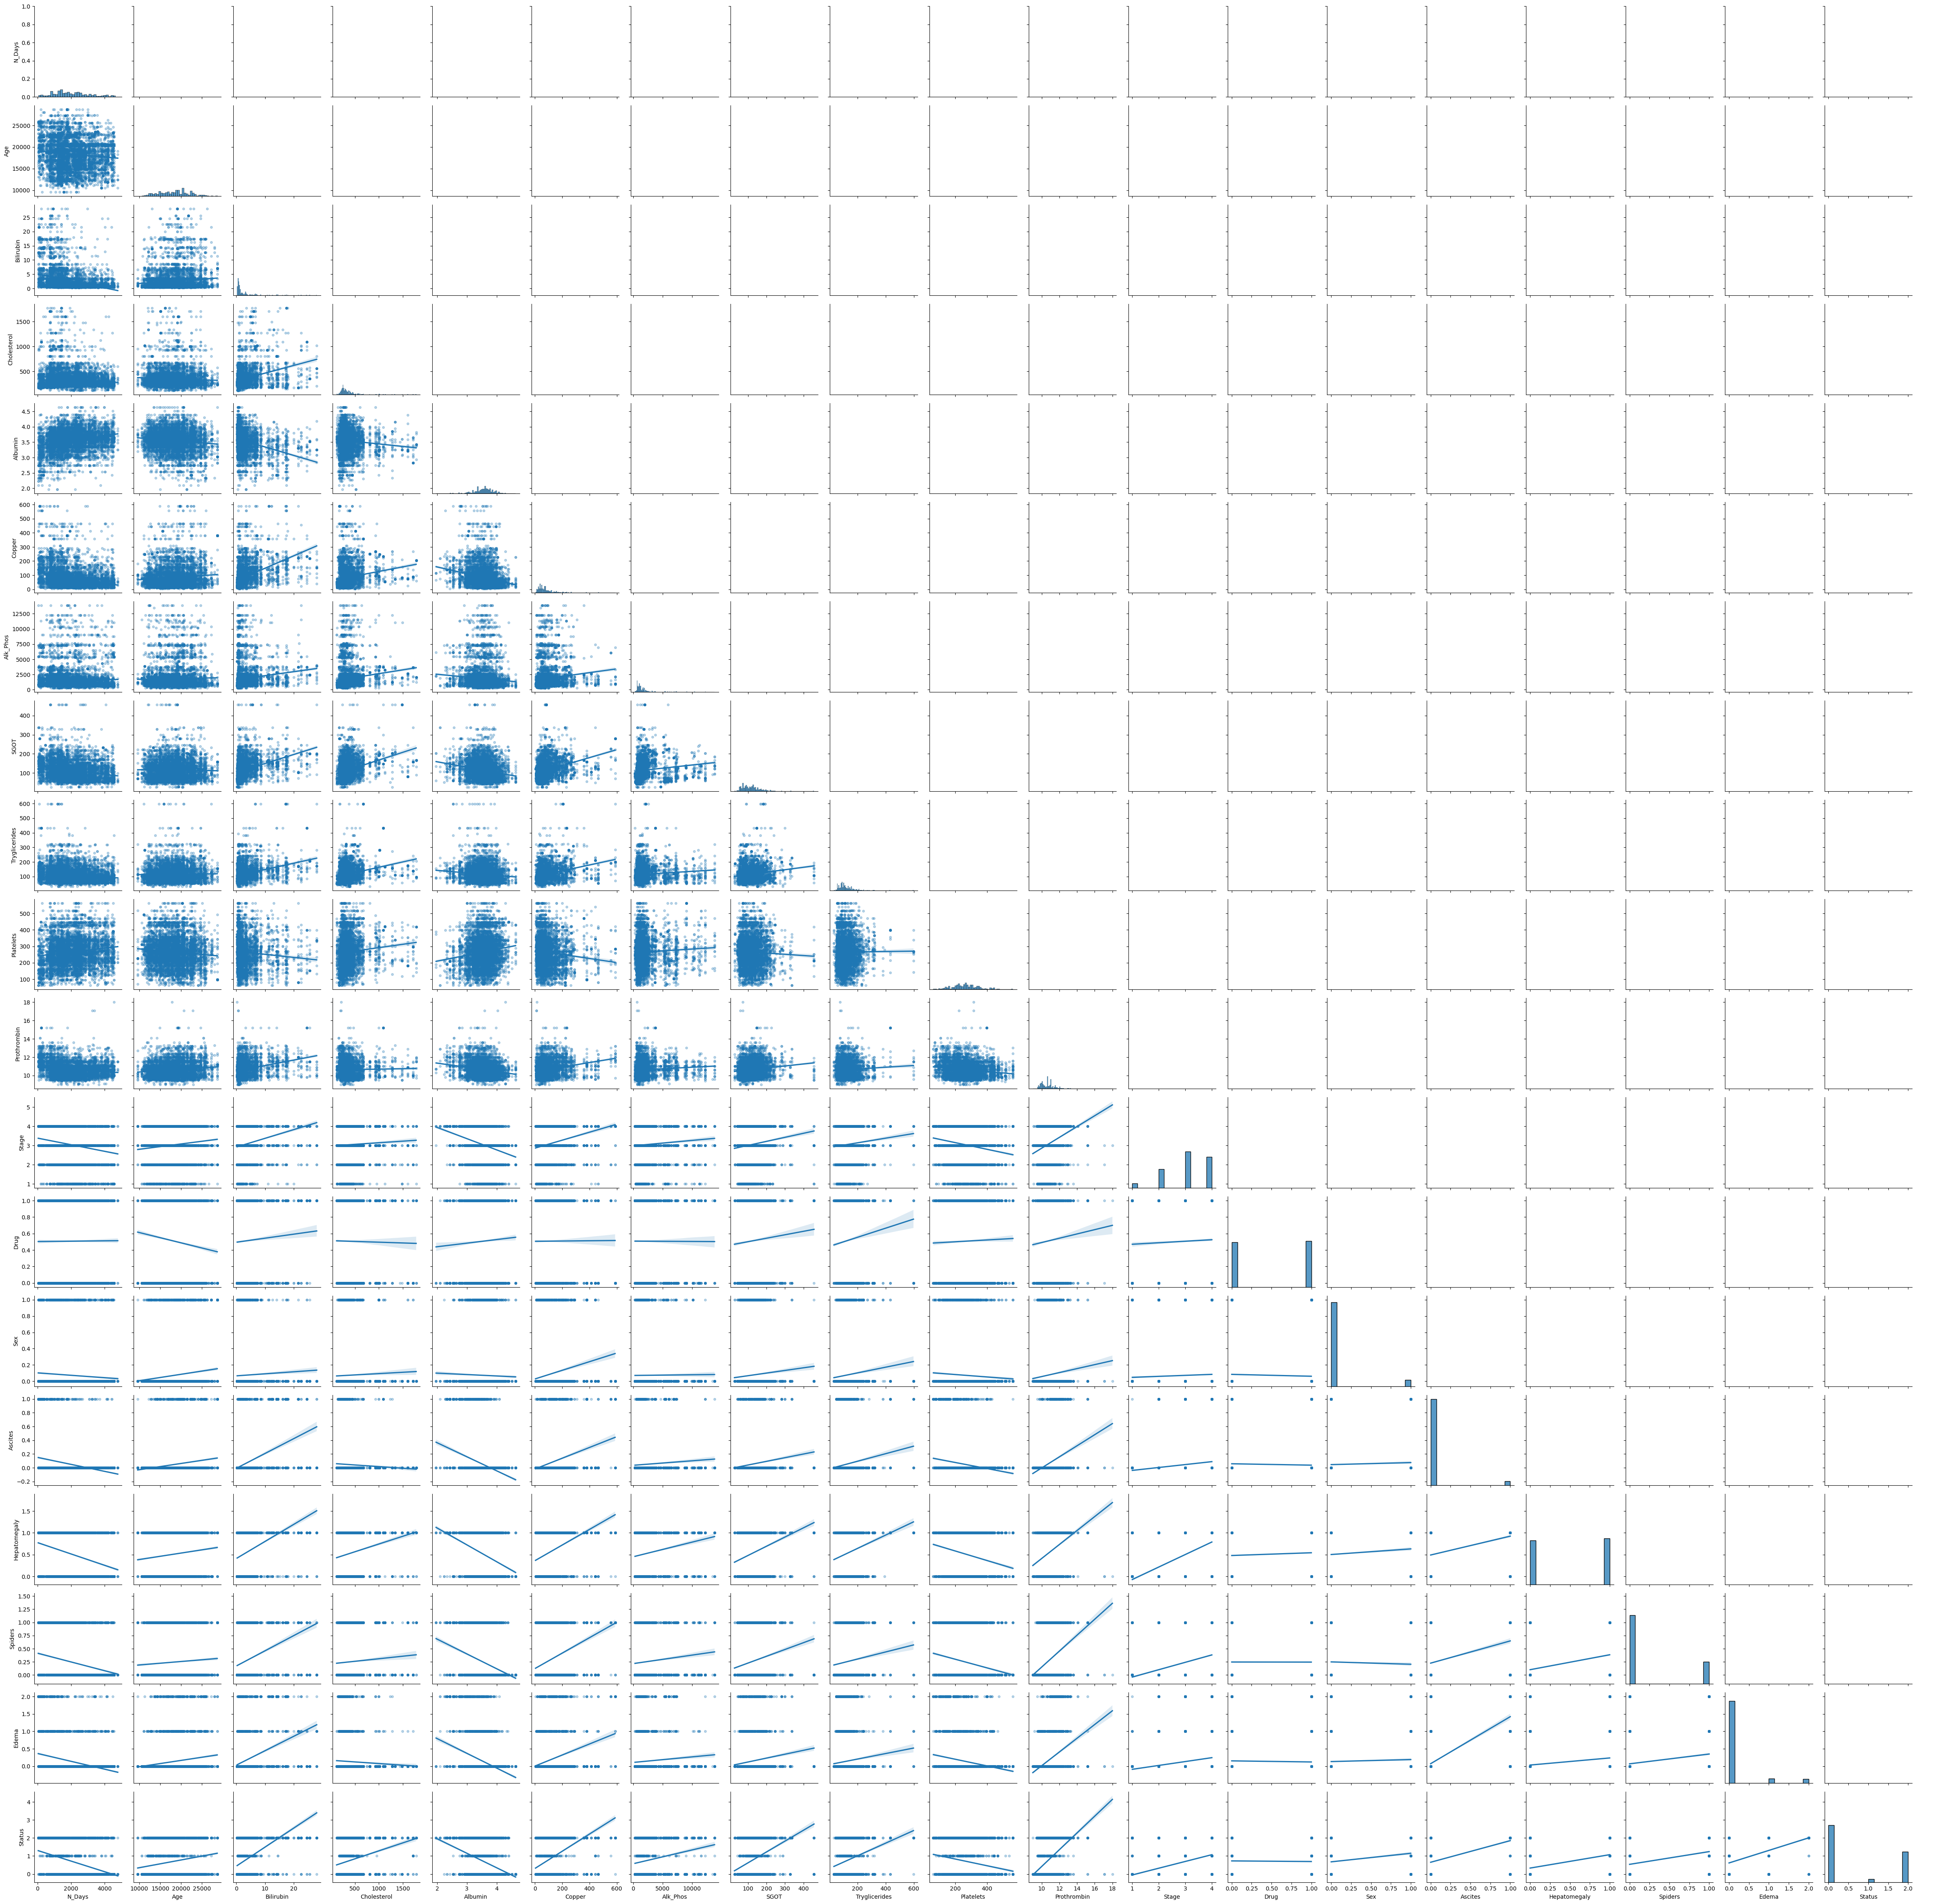

In [15]:
# Pair grid with all data attributes
pair_grid = sns.PairGrid(df_train_copy_processed, vars=['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'])
pair_grid = pair_grid.map_lower(sns.regplot, scatter_kws={'alpha': 0.3, 's': 15})
pair_grid = pair_grid.map_diag(sns.histplot, kde=False)
pair_grid = pair_grid.add_legend()
plt.show()

# As indicated by the correlation matrix before, there are no strong linear correlations
# In addition, it seems like there are also no strong non-linear correlations

# Order:
# looking at each attribute against the Status variable (last row of the pair grid), we can also see that there is no order in the data set 
# (so the data points are in random order)

## Relationships between Individual Features and the Response Variable

### Categorical Features

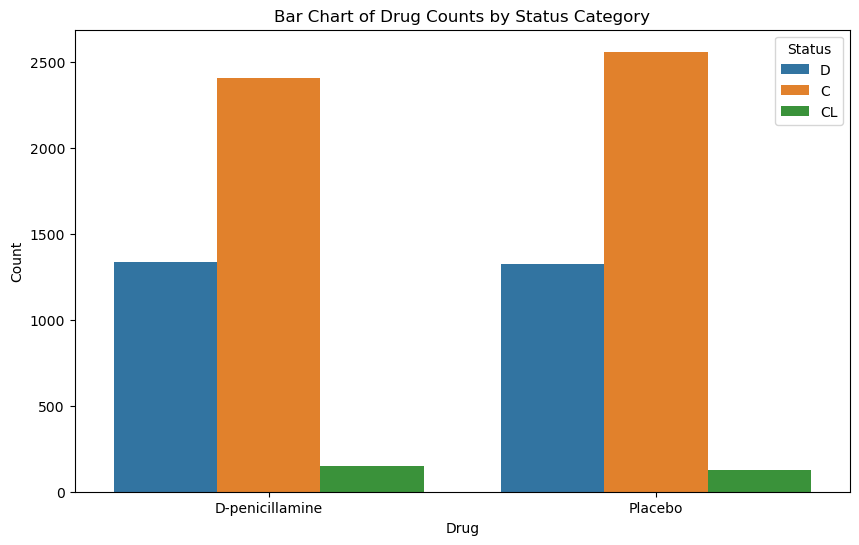

Status              C   CL     D
Drug                            
D-penicillamine  2405  151  1339
Placebo          2560  124  1326


In [16]:
# Bar Chart Drug
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_copy, x='Drug', hue='Status')
plt.title('Bar Chart of Drug Counts by Status Category')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

cross_table = pd.crosstab(df_train_copy['Drug'], df_train_copy['Status'])
print(cross_table)

# Status is relatively equally distributed across D-penicillamine and the placebo.
# Whether a patient took D-penicillamine or a placebo seems therefore not to be a strong predictor for the status class.

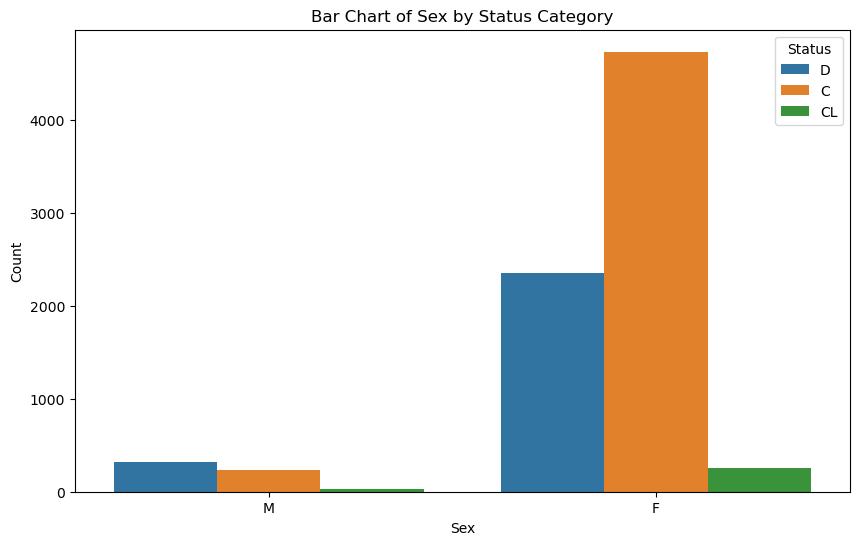

Status     C   CL     D
Sex                    
F       4735  251  2350
M        230   24   315


In [17]:
# Bar Chart Sex
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_copy, x='Sex', hue='Status')
plt.title('Bar Chart of Sex by Status Category')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

cross_table = pd.crosstab(df_train_copy['Sex'], df_train_copy['Status'])
print(cross_table)

# We see an unequal distribution of gender in our dataset: there are significantly more observations of female than male persons in our dataset.
# We therefore have a class imbalance in the Sex feature.

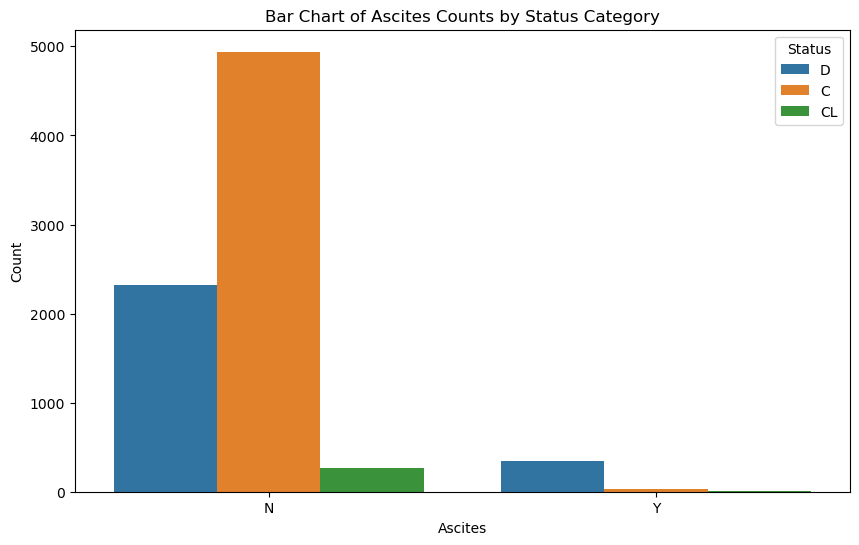

Status      C   CL     D
Ascites                 
N        4940  269  2316
Y          25    6   349


In [18]:
# Bar Chart Ascites
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_copy, x='Ascites', hue='Status')
plt.title('Bar Chart of Ascites Counts by Status Category')
plt.xlabel('Ascites')
plt.ylabel('Count')
plt.show()

cross_table = pd.crosstab(df_train_copy['Ascites'], df_train_copy['Status'])
print(cross_table)

# Feature Ascites is imbalanced with more data in category "N".

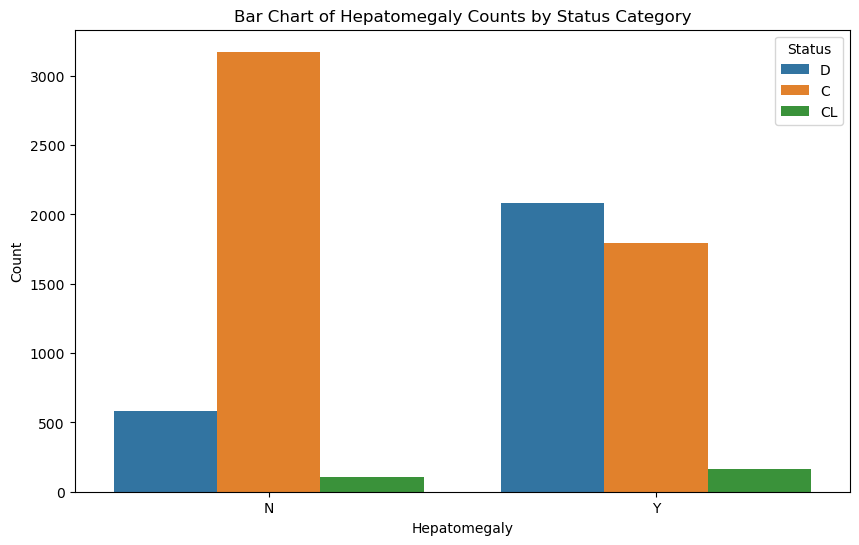

Status           C   CL     D
Hepatomegaly                 
N             3174  109   580
Y             1791  166  2085


In [19]:
# Bar Chart Hepatomegaly
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_copy, x='Hepatomegaly', hue='Status')
plt.title('Bar Chart of Hepatomegaly Counts by Status Category')
plt.xlabel('Hepatomegaly')
plt.ylabel('Count')
plt.show()

cross_table = pd.crosstab(df_train_copy['Hepatomegaly'], df_train_copy['Status'])
print(cross_table)

# Different distributions of stati for Hepatomegaly.
# Hepatomegaly could be a weak indicator for status.

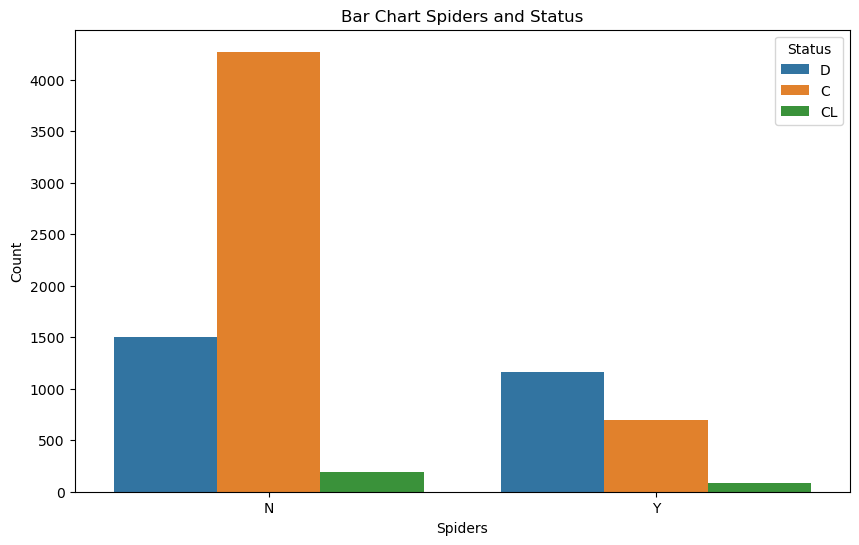

Status      C   CL     D
Spiders                 
N        4272  193  1501
Y         693   82  1164


In [20]:
# Bar Chart Spiders
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_copy, x='Spiders', hue='Status')
plt.title('Bar Chart Spiders and Status')
plt.xlabel('Spiders')
plt.ylabel('Count')
plt.show()

cross_table = pd.crosstab(df_train_copy['Spiders'], df_train_copy['Status'])
print(cross_table)

# Imbalanced classes.
# Status "C" counts much more observations of Spider class "N" than Spider class "Y".

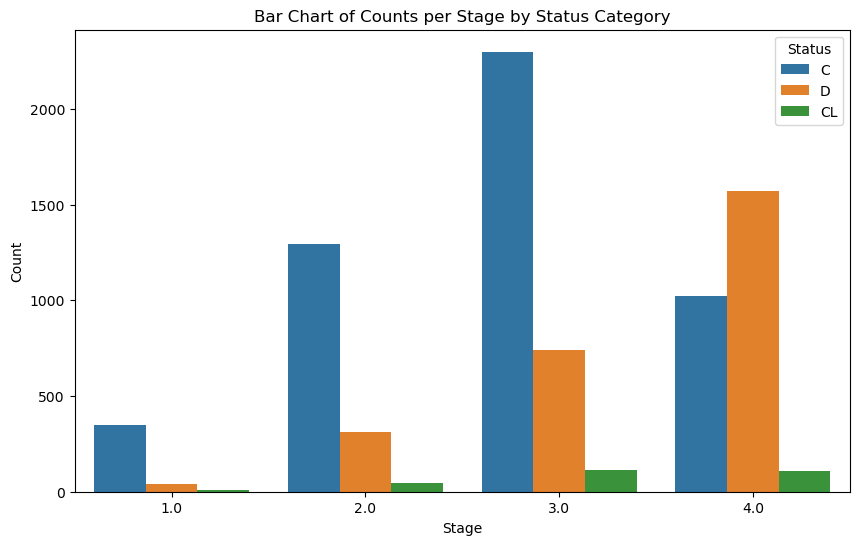

Status     C   CL     D
Stage                  
1.0      351    7    39
2.0     1293   47   312
3.0     2298  113   742
4.0     1023  108  1572


In [21]:
# Bar Chart Stage
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_copy, x='Stage', hue='Status')
plt.title('Bar Chart of Counts per Stage by Status Category')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

cross_table = pd.crosstab(df_train_copy['Stage'], df_train_copy['Status'])
print(cross_table)

# Majority of observations fall into stage 3 and 4.
# Status C and CL show a peak of their distribution in stage 3 with a light tail towards lower stages.
# Status D shows an increasing trend.

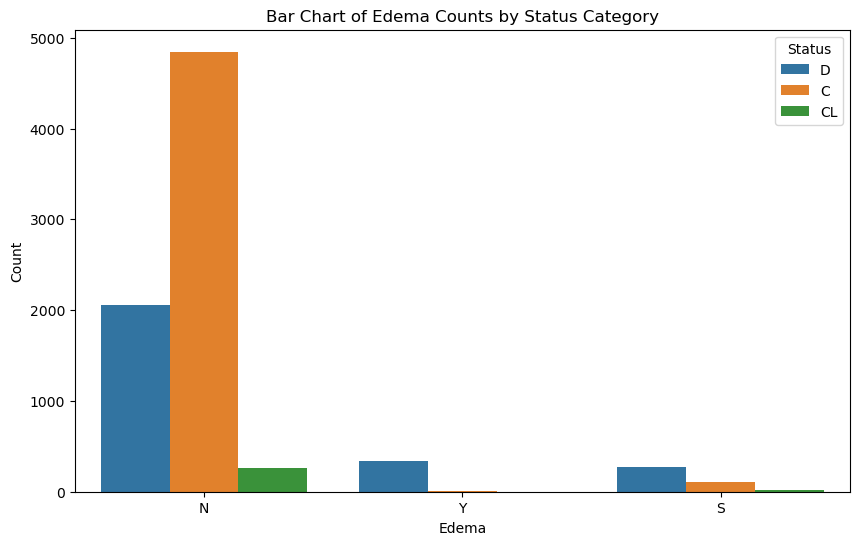

Status     C   CL     D
Edema                  
N       4847  257  2057
S        110   16   273
Y          8    2   335


In [22]:
# Bar Chart Edema
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_copy, x='Edema', hue='Status')
plt.title('Bar Chart of Edema Counts by Status Category')
plt.xlabel('Edema')
plt.ylabel('Count')
plt.show()

cross_table = pd.crosstab(df_train_copy['Edema'], df_train_copy['Status'])
print(cross_table)

# Imbalanced classes with the majority of observations in Edema category "N"

### Numerical Features

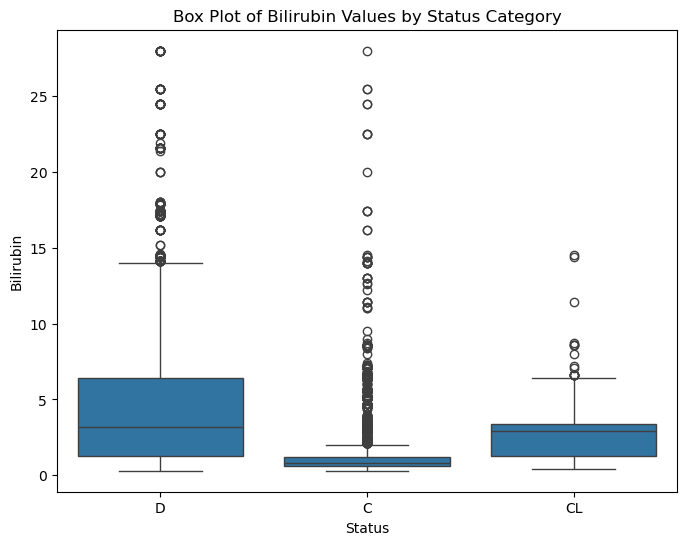

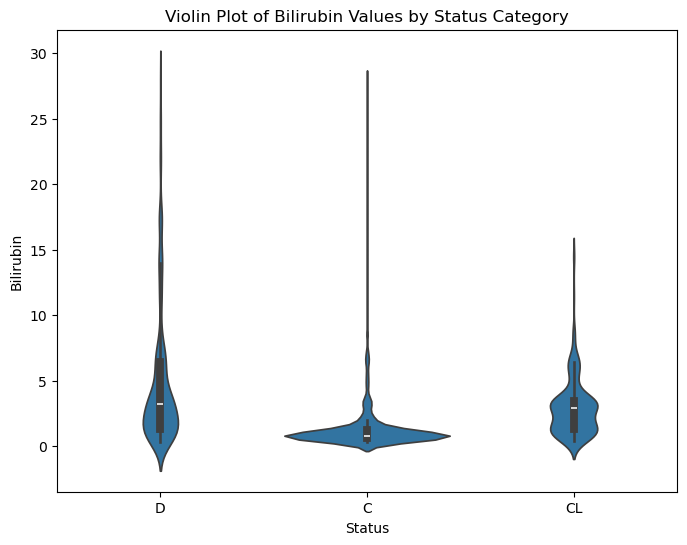

            Mean  Median
Status                  
C       1.362699     0.8
CL      2.903273     2.9
D       4.857486     3.2


In [23]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Bilirubin', data=df_train_copy)
plt.title('Box Plot of Bilirubin Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Bilirubin')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='Bilirubin', data=df_train_copy)
plt.title('Violin Plot of Bilirubin Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Bilirubin')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['Bilirubin'].mean()
medians = df_train_copy.groupby('Status')['Bilirubin'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Differences of Bilirubin value observations across different stati.
# We see many outliers in category C but overall low variance.
# We see some outliers in category D with overall highest variance.
# Only few outliers in category CL with medium variance.
# Median lies much lower than mean in categories D and CL.

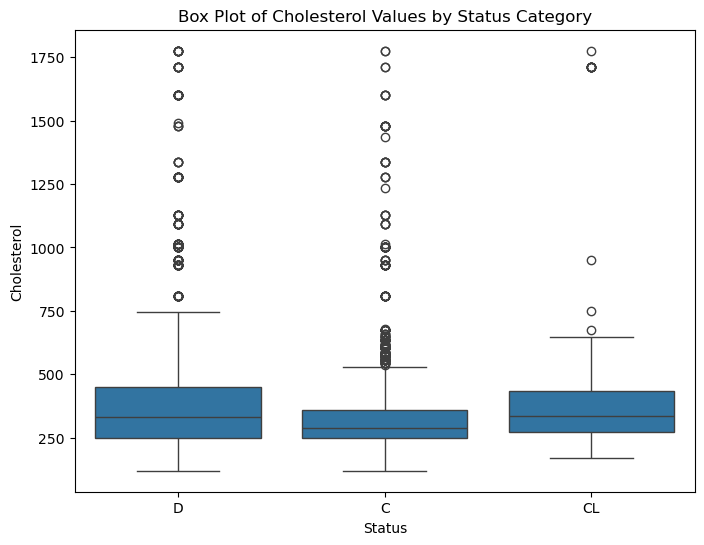

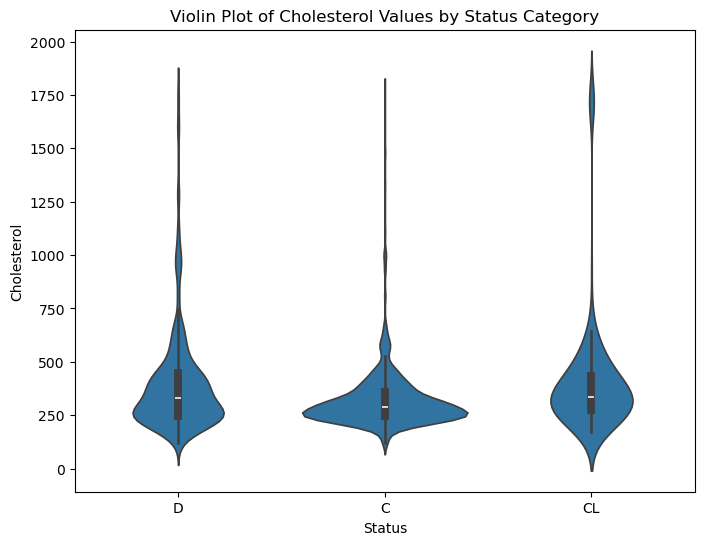

              Mean  Median
Status                    
C       322.078751   288.0
CL      404.829091   336.0
D       398.027392   331.0


In [24]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Cholesterol', data=df_train_copy)
plt.title('Box Plot of Cholesterol Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Cholesterol')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='Cholesterol', data=df_train_copy)
plt.title('Violin Plot of Cholesterol Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Cholesterol')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['Cholesterol'].mean()
medians = df_train_copy.groupby('Status')['Cholesterol'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Outliers in all categories.
# Variance across categories is relatively equal.
# Median lies slightly below mean in all categories.
# Only small differences of median value across status categories.

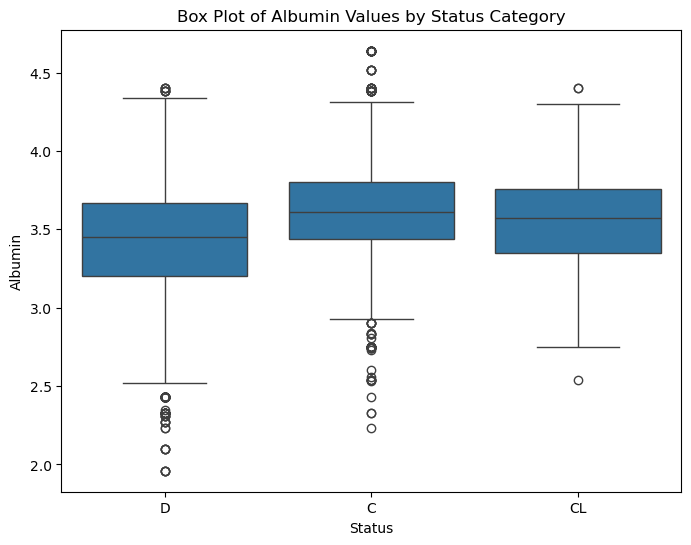

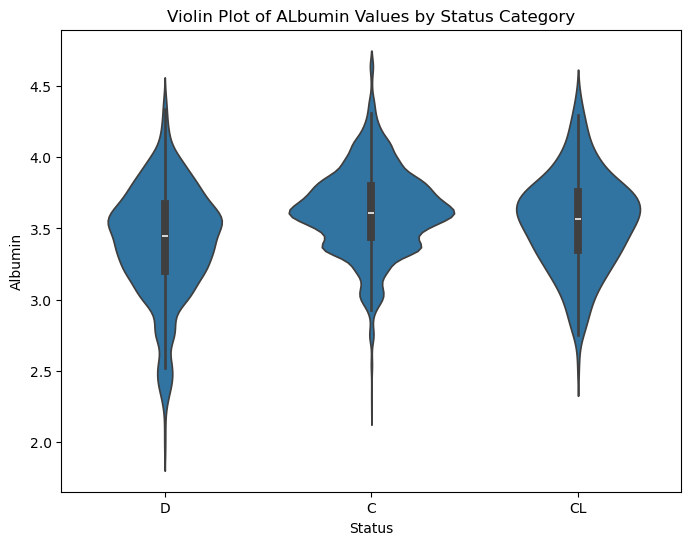

            Mean  Median
Status                  
C       3.624918    3.61
CL      3.547418    3.57
D       3.405715    3.45


In [25]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Albumin', data=df_train_copy)
plt.title('Box Plot of Albumin Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Albumin')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='Albumin', data=df_train_copy)
plt.title('Violin Plot of ALbumin Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Albumin')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['Albumin'].mean()
medians = df_train_copy.groupby('Status')['Albumin'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Outliers in all categories in both directions.
# Variance in all status categories relatively equal.
# Median value of class D is slightly lower compared to classes C and CL.

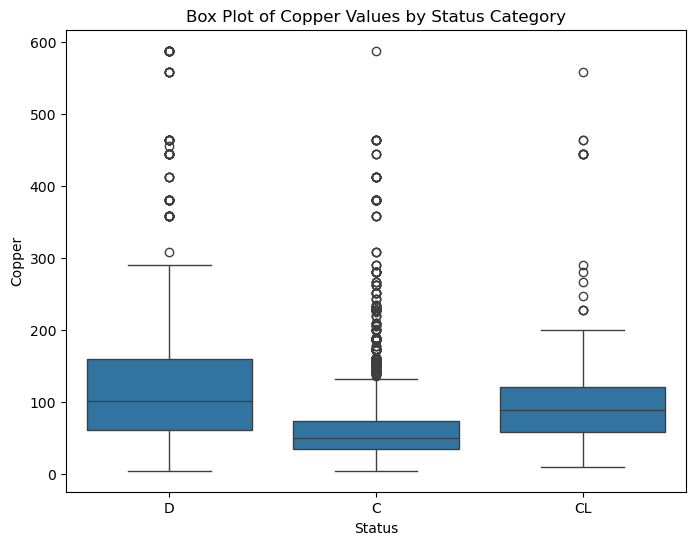

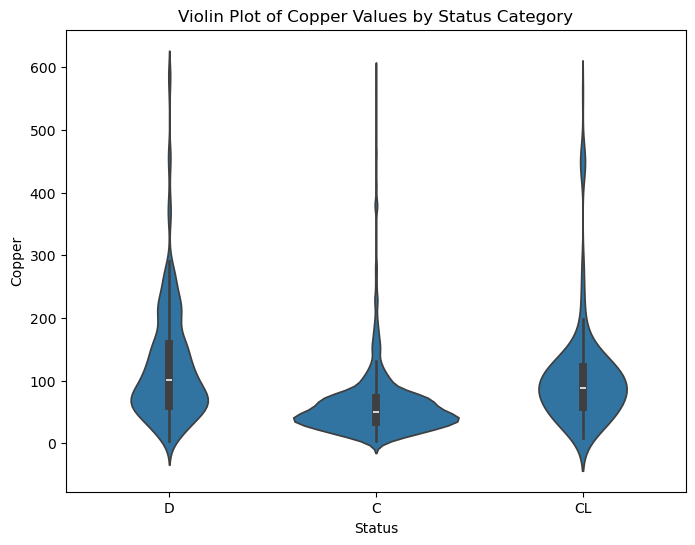

              Mean  Median
Status                    
C        61.491641    50.0
CL      102.905455    89.0
D       123.694934   101.0


In [26]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Copper', data=df_train_copy)
plt.title('Box Plot of Copper Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Copper')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='Copper', data=df_train_copy)
plt.title('Violin Plot of Copper Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Copper')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['Copper'].mean()
medians = df_train_copy.groupby('Status')['Copper'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Outliers in all status categories.
# Variance in classes D and CL higher than in class C.
# Median values lie below mean values in all three classes.

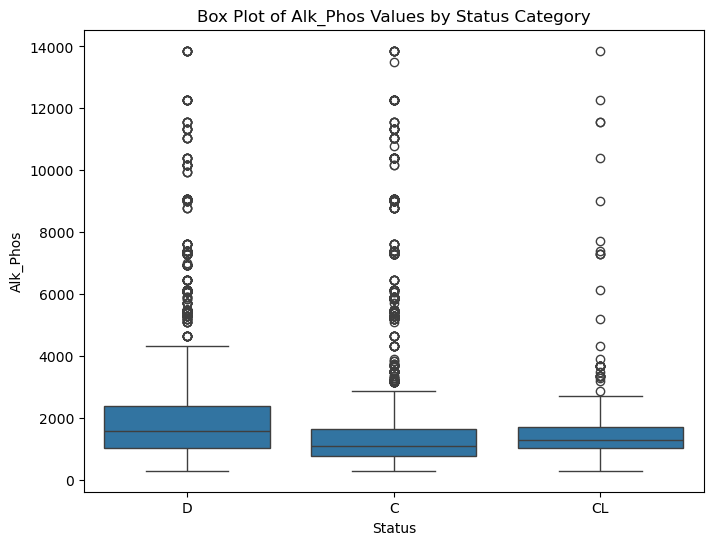

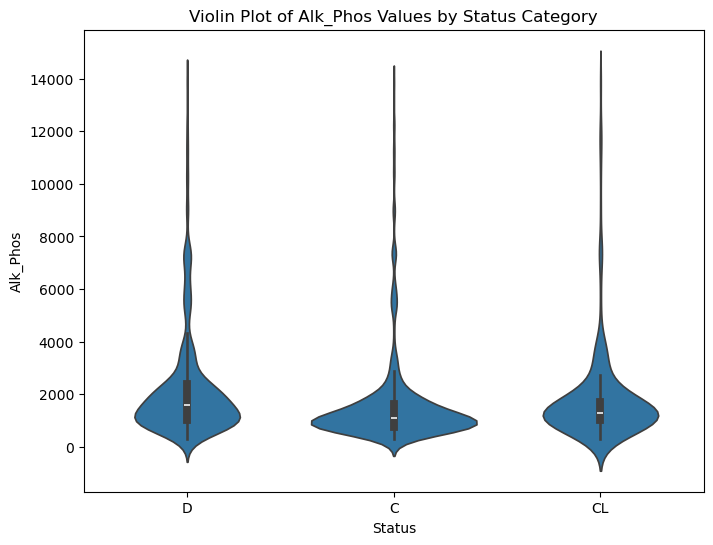

               Mean  Median
Status                     
C       1596.690715  1082.0
CL      1823.011636  1273.0
D       2226.068893  1580.0


In [27]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Alk_Phos', data=df_train_copy)
plt.title('Box Plot of Alk_Phos Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Alk_Phos')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='Alk_Phos', data=df_train_copy)
plt.title('Violin Plot of Alk_Phos Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Alk_Phos')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['Alk_Phos'].mean()
medians = df_train_copy.groupby('Status')['Alk_Phos'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Extreme outliers to the top in all three status classes.
# Relatively equal variance across all stati.
# Median values much lower than mean values.

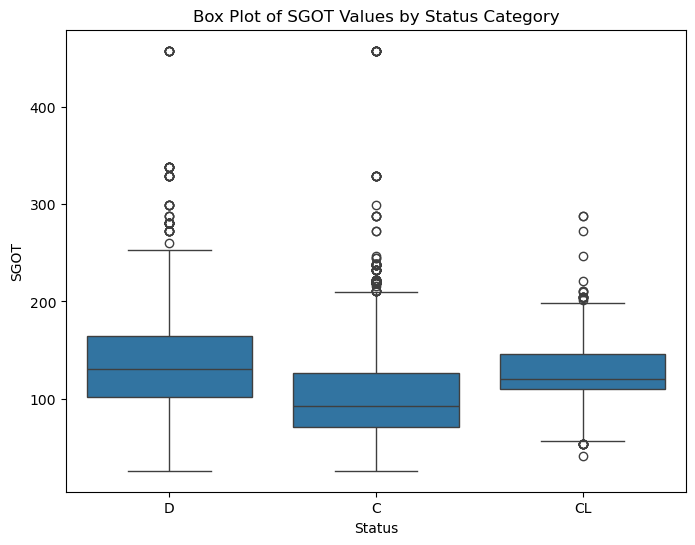

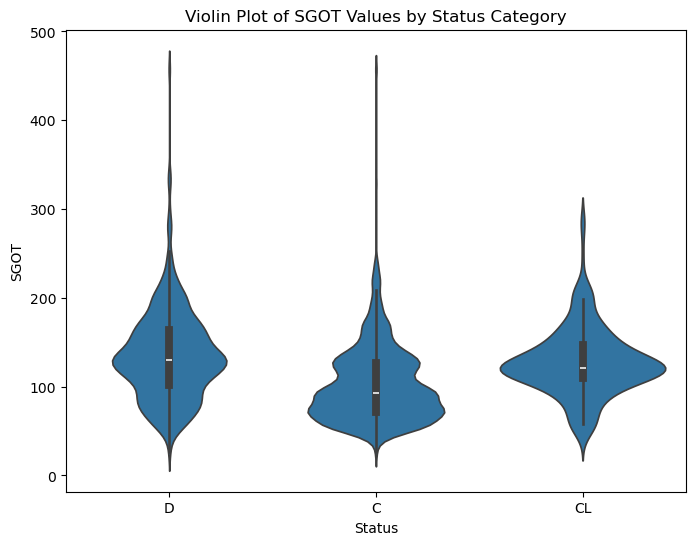

              Mean  Median
Status                    
C       102.832914    93.0
CL      127.439673   120.9
D       135.211276   130.2


In [28]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='SGOT', data=df_train_copy)
plt.title('Box Plot of SGOT Values by Status Category')
plt.xlabel('Status')
plt.ylabel('SGOT')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='SGOT', data=df_train_copy)
plt.title('Violin Plot of SGOT Values by Status Category')
plt.xlabel('Status')
plt.ylabel('SGOT')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['SGOT'].mean()
medians = df_train_copy.groupby('Status')['SGOT'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Outliers to the top in all status categories.
# Median and mean values are only slightly different, with median values smaller than mean values.

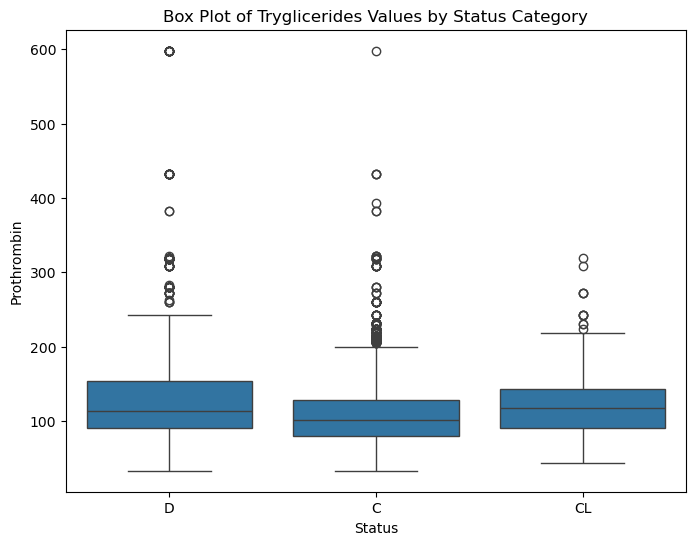

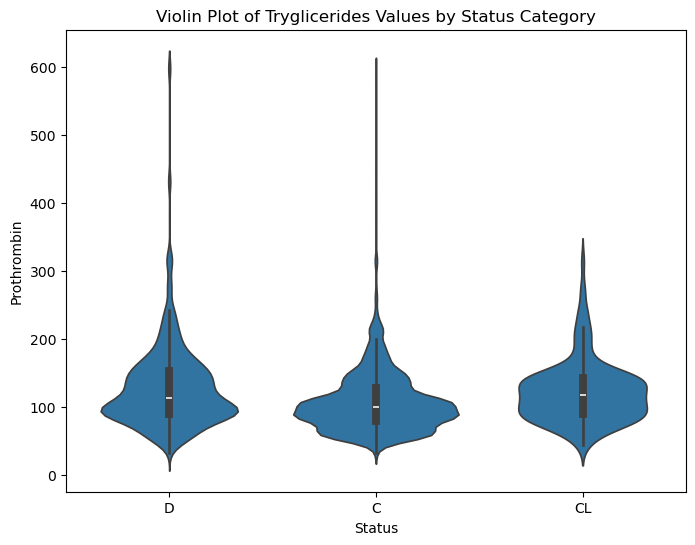

              Mean  Median
Status                    
C       107.406647   101.0
CL      122.556364   118.0
D       129.375985   114.0


In [29]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Tryglicerides', data=df_train_copy)
plt.title('Box Plot of Tryglicerides Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Prothrombin')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='Tryglicerides', data=df_train_copy)
plt.title('Violin Plot of Tryglicerides Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Prothrombin')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['Tryglicerides'].mean()
medians = df_train_copy.groupby('Status')['Tryglicerides'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Outliers in all status categories, most extremely in status classes D and C.
# Moderate variance in all status classes.
# Median values (especially in class D) are a bit lower than mean values.

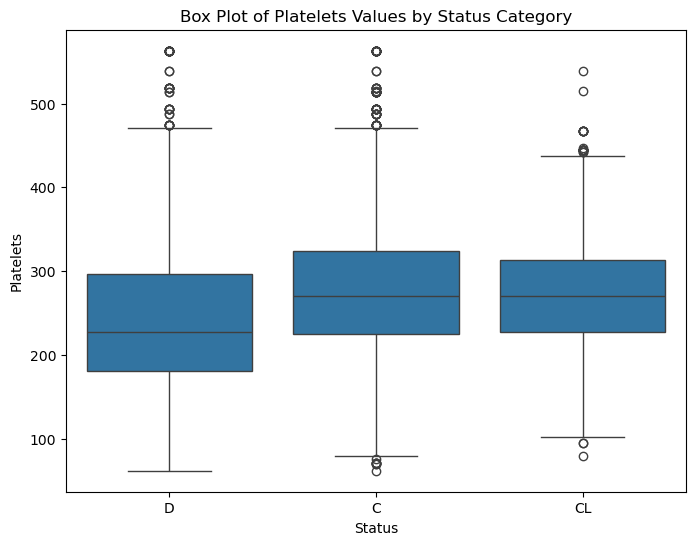

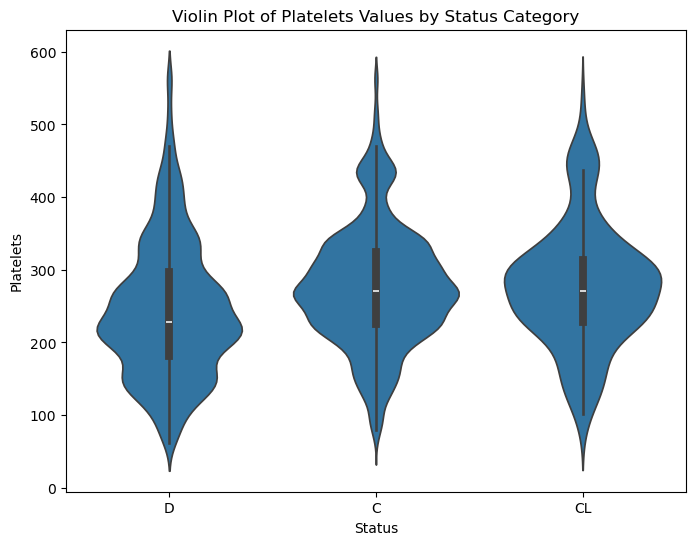

              Mean  Median
Status                    
C       276.215106   271.0
CL      277.414545   271.0
D       243.503940   228.0


In [30]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Platelets', data=df_train_copy)
plt.title('Box Plot of Platelets Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Platelets')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='Platelets', data=df_train_copy)
plt.title('Violin Plot of Platelets Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Platelets')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['Platelets'].mean()
medians = df_train_copy.groupby('Status')['Platelets'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Some outliers in both directions.
# High variance in all classes. 
# Median values are slightly lower than mean values.
# Status C and CL have the same median, status D a lower median compared to C and CL.

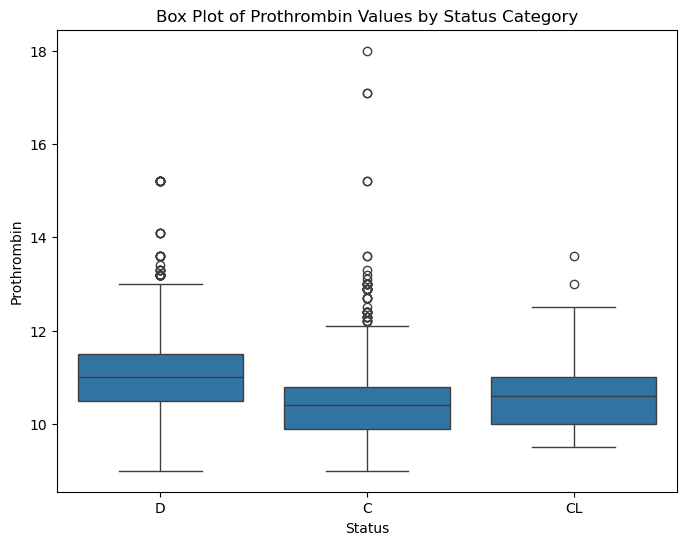

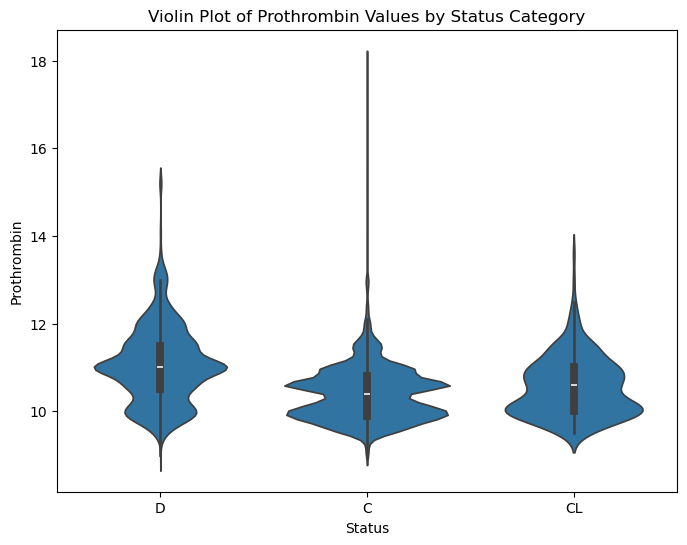

             Mean  Median
Status                   
C       10.405076    10.4
CL      10.549091    10.6
D       11.055797    11.0


In [31]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Prothrombin', data=df_train_copy)
plt.title('Box Plot of Prothrombin Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Prothrombin')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='Prothrombin', data=df_train_copy)
plt.title('Violin Plot of Prothrombin Values by Status Category')
plt.xlabel('Status')
plt.ylabel('Prothrombin')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['Prothrombin'].mean()
medians = df_train_copy.groupby('Status')['Prothrombin'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Some outliers, especially in status class C.
# Mean and median relatively equal.

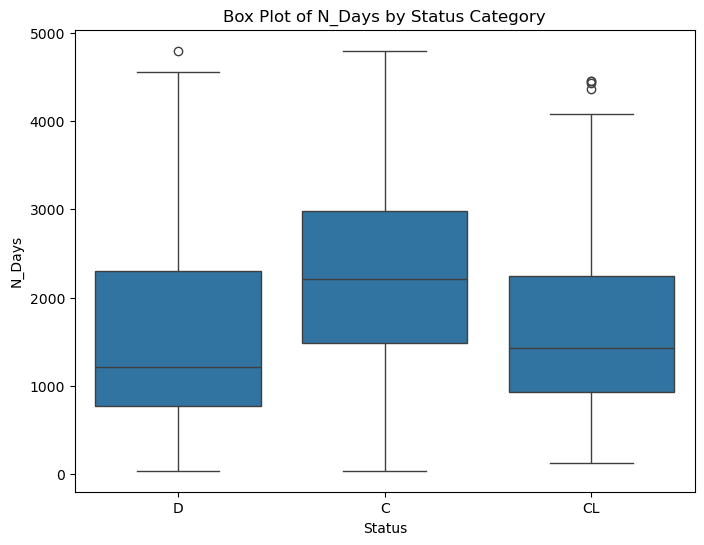

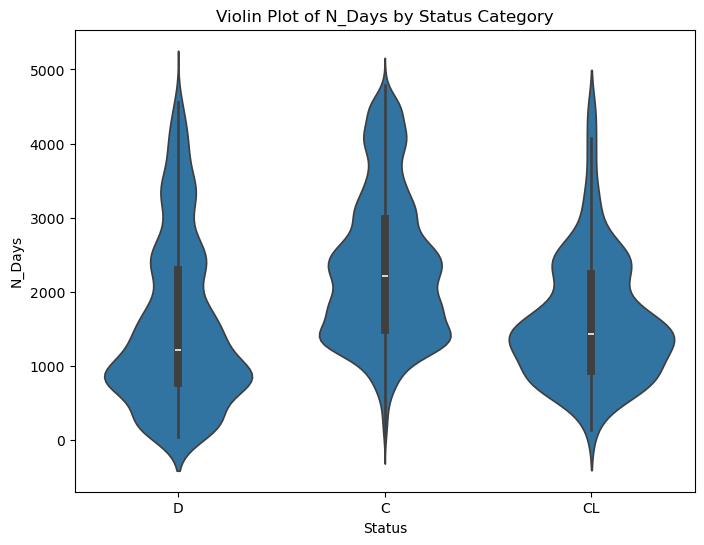

               Mean  Median
Status                     
C       2322.529305  2216.0
CL      1610.105455  1435.0
D       1528.849156  1216.0


In [32]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='N_Days', data=df_train_copy)
plt.title('Box Plot of N_Days by Status Category')
plt.xlabel('Status')
plt.ylabel('N_Days')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='N_Days', data=df_train_copy)
plt.title('Violin Plot of N_Days by Status Category')
plt.xlabel('Status')
plt.ylabel('N_Days')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['N_Days'].mean()
medians = df_train_copy.groupby('Status')['N_Days'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# Almost no outliers.
# Median values below mean values in all categories.
# High variance.

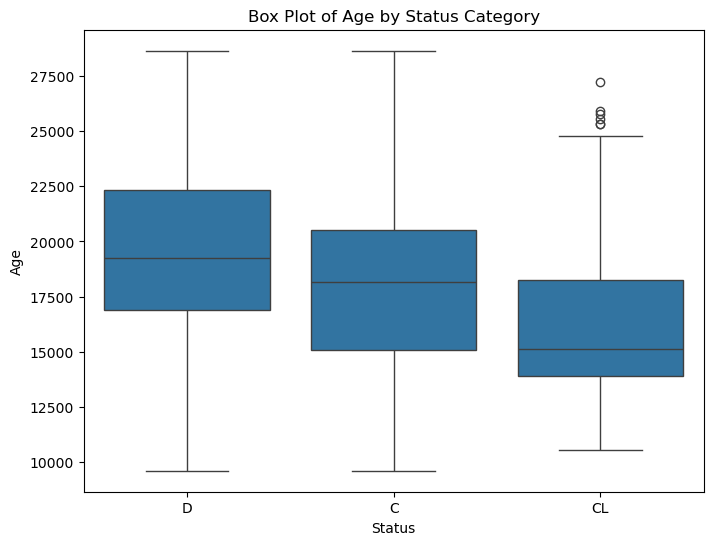

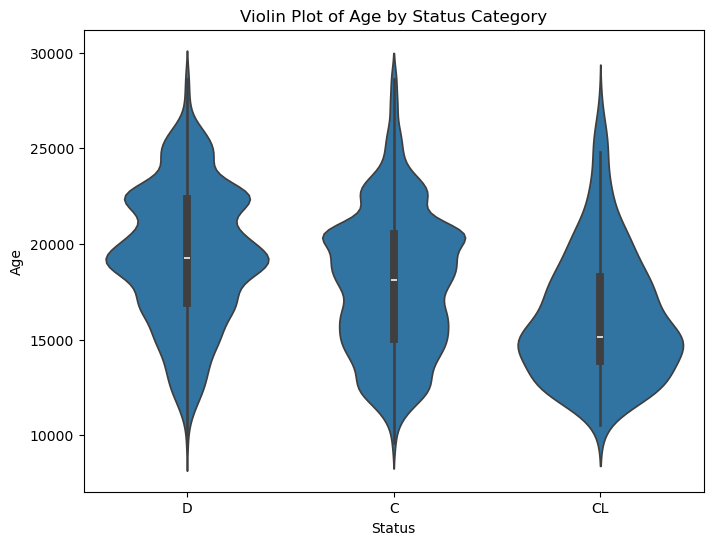

                Mean   Median
Status                       
C       17969.769587  18137.0
CL      16230.600000  15112.0
D       19345.741839  19256.0


In [33]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Age', data=df_train_copy)
plt.title('Box Plot of Age by Status Category')
plt.xlabel('Status')
plt.ylabel('Age')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Status', y='Age', data=df_train_copy)
plt.title('Violin Plot of Age by Status Category')
plt.xlabel('Status')
plt.ylabel('Age')
plt.show()

# Mean and median
means = df_train_copy.groupby('Status')['Age'].mean()
medians = df_train_copy.groupby('Status')['Age'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

#some outliers in status CL
#some discrepancy between mean and median but not as strong as for other features
# very high variance

## Relationships between two Features

Selection based on highest linear correlations

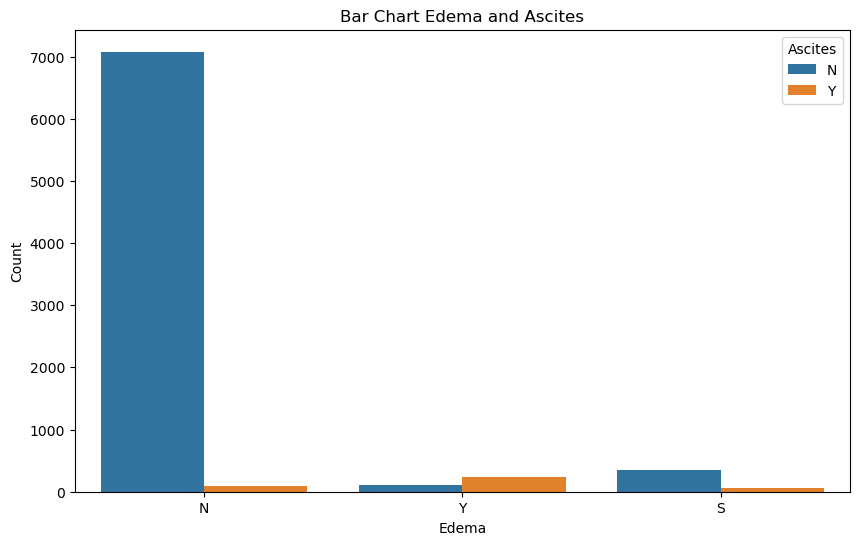

Ascites     N    Y
Edema             
N        7077   84
S         347   52
Y         101  244


In [34]:
# Bar Chart Edema and Ascites
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_copy, x='Edema', hue='Ascites')
plt.title('Bar Chart Edema and Ascites')
plt.xlabel('Edema')
plt.ylabel('Count')
plt.show()

cross_table = pd.crosstab(df_train_copy['Edema'], df_train_copy['Ascites'])
print(cross_table)

# Most obeservations for Ascites class "N" and Edema class "N".
# Both classes are heavily unbalanced.

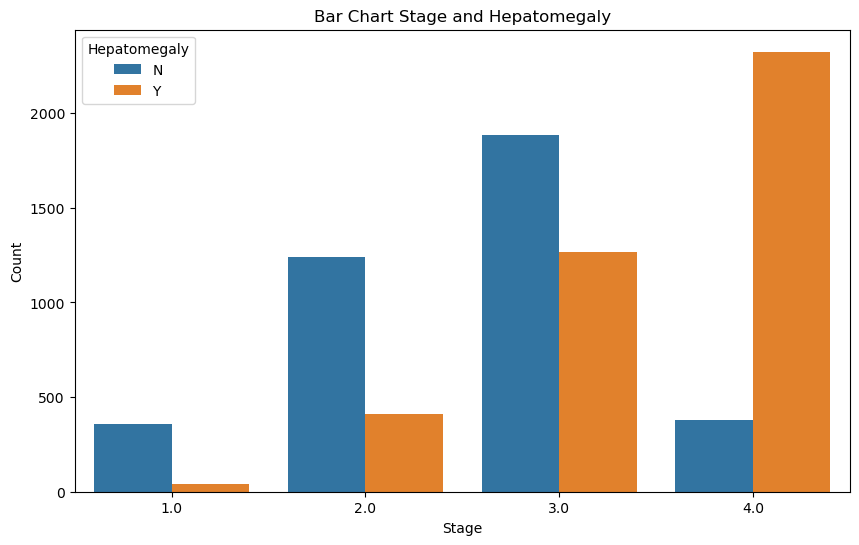

Hepatomegaly     N     Y
Stage                   
1.0            358    39
2.0           1240   412
3.0           1887  1266
4.0            378  2325


In [35]:
# Bar Chart Stage and Hepatomegaly
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train_copy, x='Stage', hue='Hepatomegaly')
plt.title('Bar Chart Stage and Hepatomegaly')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

cross_table = pd.crosstab(df_train_copy['Stage'], df_train_copy['Hepatomegaly'])
print(cross_table)

# Clear rising trend in Hepatomegaly class "Y".
# Hepatomegaly class "N" has a peak in stage 3, stages 1 and 4 are approximately eaqually distributed.

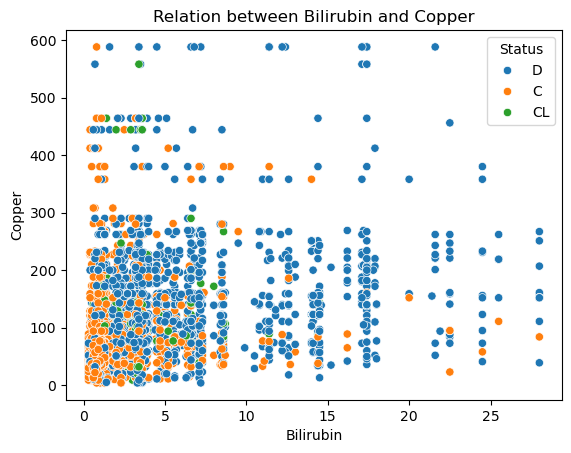

In [36]:
# Scatterplot Bilirubin vs Copper
sns.scatterplot(x="Bilirubin", y="Copper", hue="Status", data=df_train_copy)
plt.legend(title='Status')
plt.title('Relation between Bilirubin and Copper')
plt.show()

# Status "D" seems to be more widely distributed across the diagram than the other classes (i.e., more outliers).
# Status "C" seems to have less/no extreme outliers in both Copper and Bilirubin. If there is an outlier, then usually only either in Copper or in Bilirubin.
# Overall, the majority of data points is clustered towards the origin of the diagram, with comparably low to medium values for both Copper and Bilirubin.

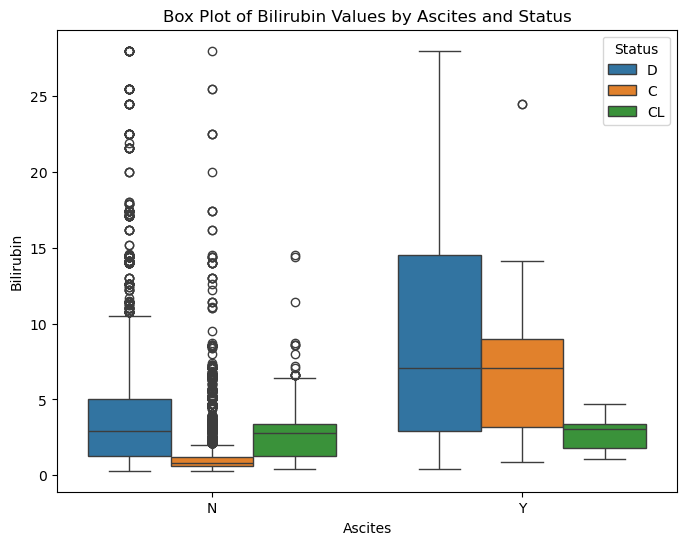

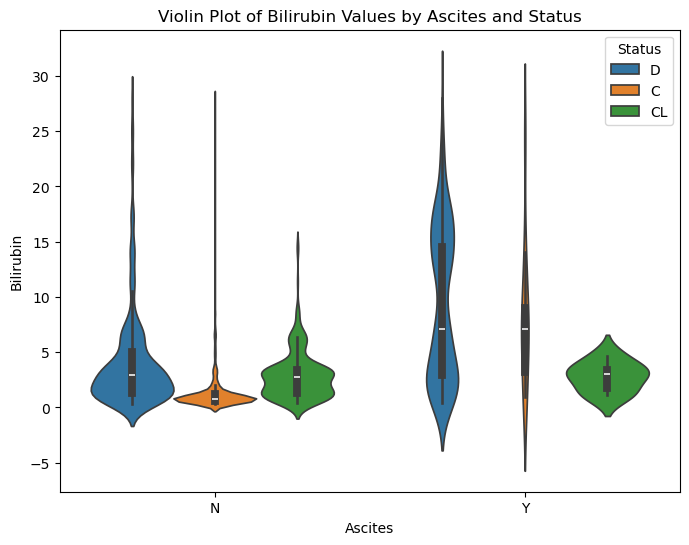

             Mean  Median
Ascites                  
N        2.265395     1.0
Y        9.111316     7.1


In [37]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Ascites', y='Bilirubin', hue='Status', data=df_train_copy)
plt.title('Box Plot of Bilirubin Values by Ascites and Status')
plt.xlabel('Ascites')
plt.ylabel('Bilirubin')
plt.legend(title='Status')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Ascites', y='Bilirubin', hue='Status', data=df_train_copy)
plt.title('Violin Plot of Bilirubin Values by Ascites and Status')
plt.xlabel('Ascites')
plt.ylabel('Bilirubin')
plt.legend(title='Status')
plt.show()

# Mean and median
means = df_train_copy.groupby('Ascites')['Bilirubin'].mean()
medians = df_train_copy.groupby('Ascites')['Bilirubin'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# There are major differences between Ascites categories "N" and "Y" in Bilirubin values.
# In category N, Bilirubin values have a much lower mean and median, lower variance and many (extreme) outliers.
# In category Y, Bilirubin values have a comparably higher mean and median, high variance (in Status D) and almost no outliers.

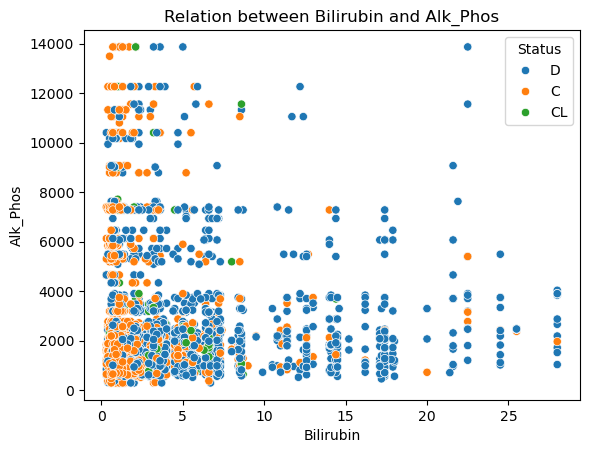

In [38]:
# Scatterplot Bilirubin vs Alk_Phos
sns.scatterplot(x="Bilirubin", y="Alk_Phos", hue="Status", data=df_train_copy)
plt.legend(title='Status')
plt.title('Relation between Bilirubin and Alk_Phos')
plt.show()

# Status "C" seems to be mainly clustered towards the y-axis, i.e. low Bilirubin values and high variance in Alk-Phos values.
# Overall, majority of data points is clustered towards the origin of the diagram. 
# Extreme outliers with high Alk_Phos and Bilirubin values are more prevalent in status class "D"

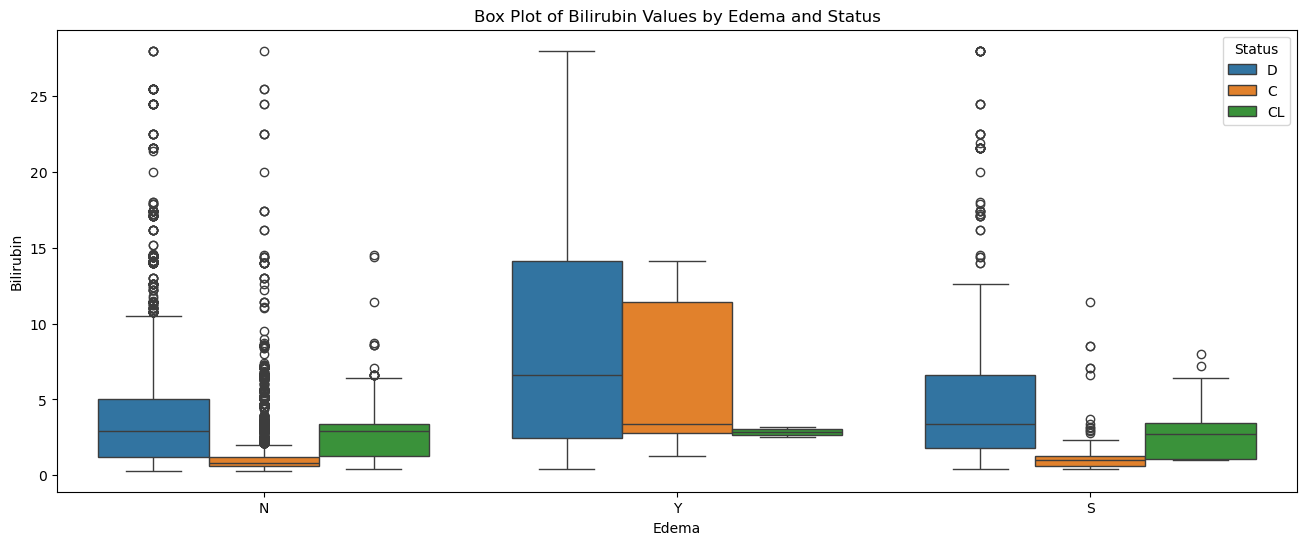

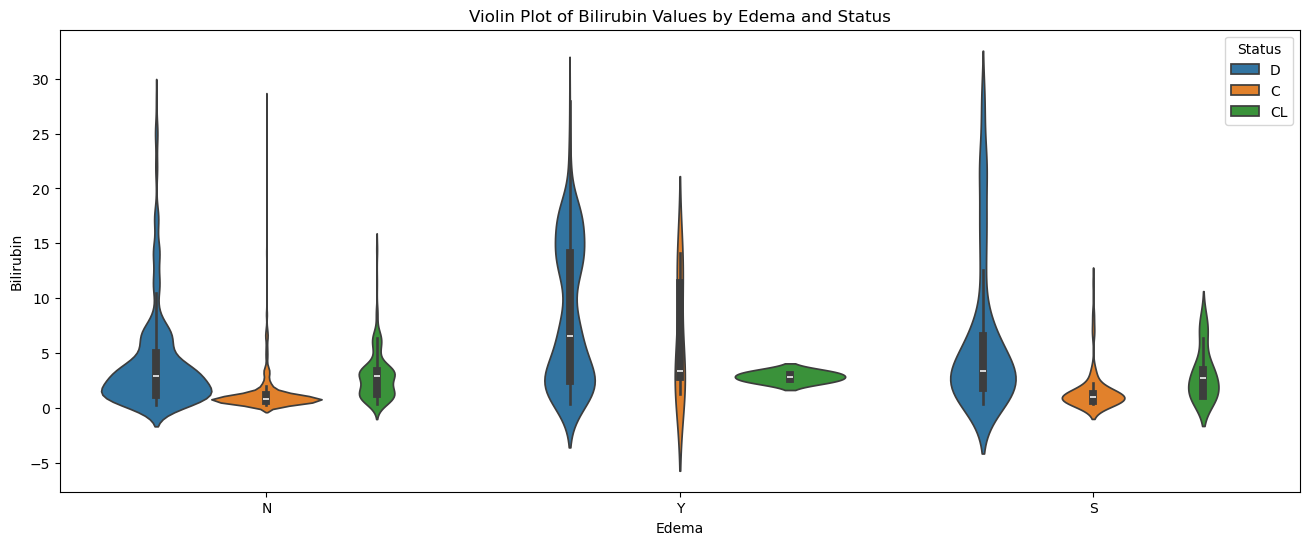

           Mean  Median
Edema                  
N      2.198841     1.0
S      4.874436     2.3
Y      8.169855     6.6


In [39]:
# Box Plot
plt.figure(figsize=(16, 6))
sns.boxplot(x='Edema', y='Bilirubin', hue='Status', data=df_train_copy)
plt.title('Box Plot of Bilirubin Values by Edema and Status')
plt.xlabel('Edema')
plt.ylabel('Bilirubin')
plt.legend(title='Status')
plt.show()

# Violin Plot
plt.figure(figsize=(16, 6))
sns.violinplot(x='Edema', y='Bilirubin', hue='Status', data=df_train_copy)
plt.title('Violin Plot of Bilirubin Values by Edema and Status')
plt.xlabel('Edema')
plt.ylabel('Bilirubin')
plt.legend(title='Status')
plt.show()

# Mean and median
means = df_train_copy.groupby('Edema')['Bilirubin'].mean()
medians = df_train_copy.groupby('Edema')['Bilirubin'].median()
stats_df = pd.DataFrame({'Mean': means, 'Median': medians})
print(stats_df)

# High discrepancy between Edema classes and status classes in variance, distribution and outliers.

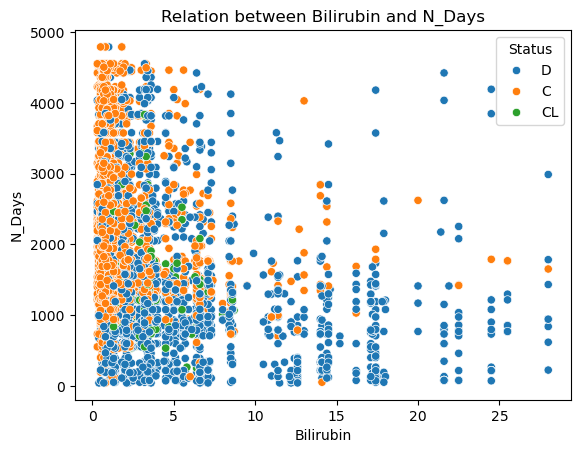

In [40]:
# Scatterplot Bilirubin vs N_Days
sns.scatterplot(x="Bilirubin", y="N_Days", hue="Status", data=df_train_copy)
plt.legend(title='Status')
plt.title('Relation between Bilirubin and N_Days')
plt.show()

# Status class C is most prevalent with low Bilirubin values and across a range of approx. 1000-4500 days.
# Status class D does not have such a dense cluster as class C, data points are more spread across the diagram, with more outliers.
# Status class D is also present in days < 1000.

Some more feature vs. feature plots (based on the pair grid, I chose some feature pairs that seemed to be more correlated than others):

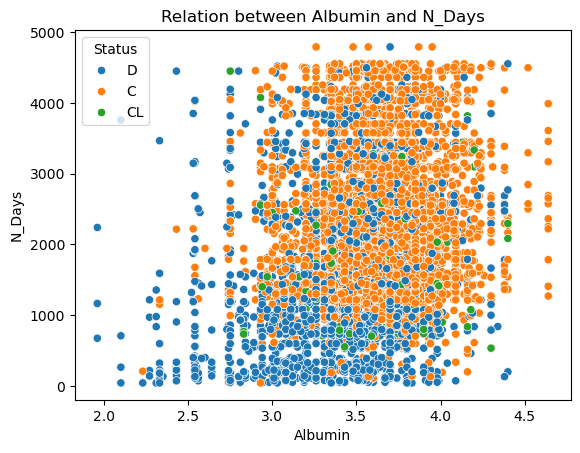

In [41]:
# Scatterplot Albumin vs N_Days
sns.scatterplot(x="Albumin", y="N_Days", hue="Status", data=df_train_copy)
plt.legend(title='Status')
plt.title('Relation between Albumin and N_Days')
plt.show()

# Status class "C" is more prevalent for N_Days values from approx. 1000 onwards.
# Status class "D" seems to be more prevalent for lower N_Days values. 
# The majority of data points across all status classes is between 3.0 and 4.0 on the Albumin scale. 
# Status class "D" seems to have more outliers towards lower Albumin values, while status class "C" seems to have more outliers towards higher Albumin values.

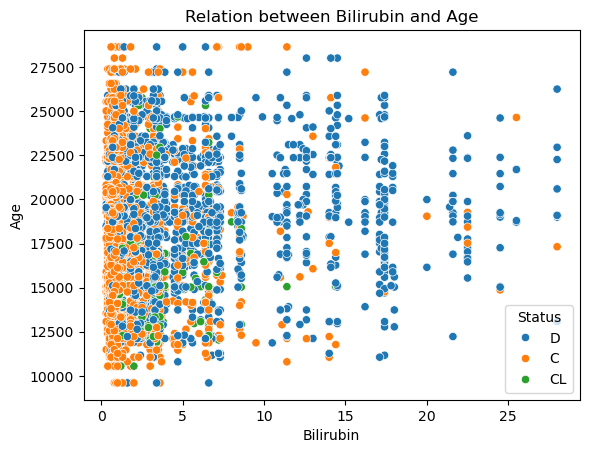

In [42]:
# Scatterplot Bilirubin vs Age
sns.scatterplot(x="Bilirubin", y="Age", hue="Status", data=df_train_copy)
plt.legend(title='Status')
plt.title('Relation between Bilirubin and Age')
plt.show()

# The majority of data points is clustered towards the y-axis with low Bilirubin values across different age values. 
# Class "D" seems to have more outliers than the other status classes. 

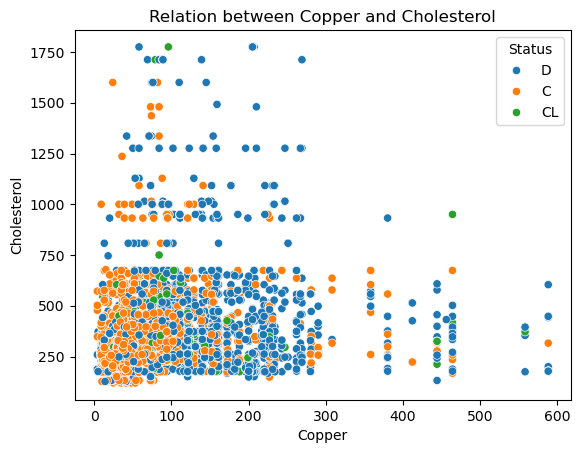

In [43]:
# Scatterplot Copper vs Cholesterol
sns.scatterplot(x="Copper", y="Cholesterol", hue="Status", data=df_train_copy)
plt.legend(title='Status')
plt.title('Relation between Copper and Cholesterol')
plt.show()

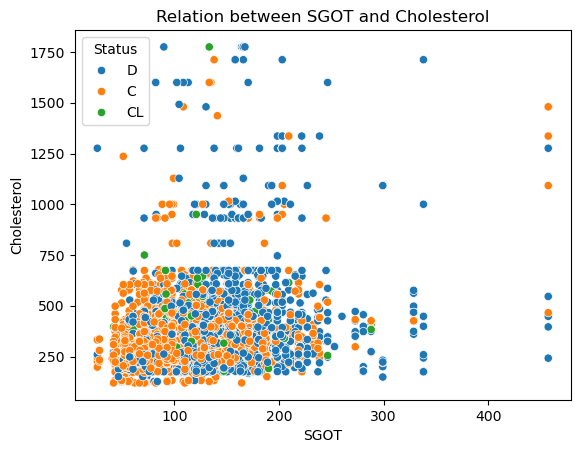

In [44]:
# Scatterplot SGOT vs Cholesterol
sns.scatterplot(x="SGOT", y="Cholesterol", hue="Status", data=df_train_copy)
plt.legend(title='Status')
plt.title('Relation between SGOT and Cholesterol')
plt.show()

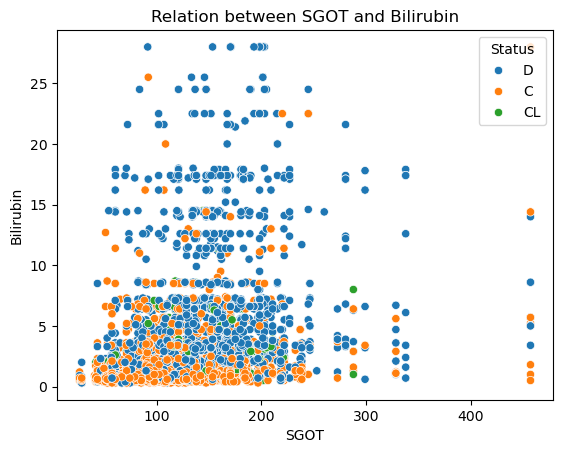

In [45]:
# Scatterplot SGOT vs Cholesterol
sns.scatterplot(x="SGOT", y="Bilirubin", hue="Status", data=df_train_copy)
plt.legend(title='Status')
plt.title('Relation between SGOT and Bilirubin')
plt.show()

## Principle Component Analysis (PCA)

In [46]:
from sklearn.model_selection import train_test_split

# split data
data_X = df_train_copy_processed.drop(columns=['id', 'Status'])
data_y = df_train_copy_processed['Status']

# create train test split
data_train, data_test, data_y_train, data_y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

# scale data
scaler = StandardScaler()
scaler.fit(data_train)
data_scaled = scaler.transform(data_train)
data_scaled_test = scaler.transform(data_test)

# apply pca
pca = PCA(n_components=2)
pca.fit(data_scaled)
bcw_pca_x = pd.DataFrame(pca.transform(data_scaled))
bcw_pca_x.columns = ['pc1', 'pc2']

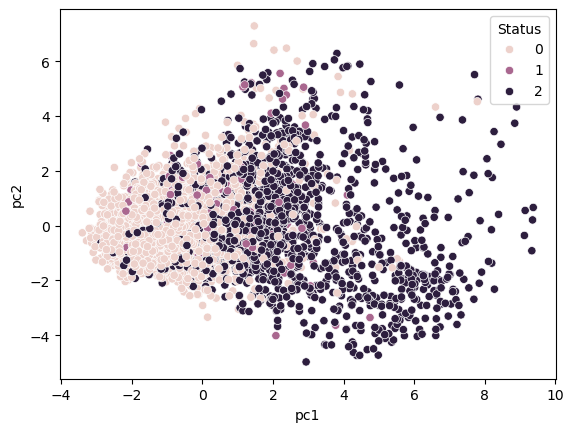

PCA explained variance ratio:


array([0.22087535, 0.09444309])

In [47]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

bcw_pca_plot = bcw_pca_x.copy(deep=True)
bcw_pca_plot['Status'] = data_y_train.reset_index(drop=True)
scatterplot(data=bcw_pca_plot, x='pc1', y='pc2', hue='Status')
plt.show()

print("PCA explained variance ratio:")
pca.explained_variance_ratio_

# We see clusters: Status 0 is more prevalent in the left center of the diagram, while status 2 is more prevalent in the right center of the diagram, with more variance and outliers compared to status 0.

In [48]:
print("PCA components:")
pca.components_

PCA components:


array([[-2.78194719e-01,  1.17447182e-01,  3.47503912e-01,
         1.26060830e-01, -2.74589972e-01,  3.10487230e-01,
         9.99737615e-02,  2.28350388e-01,  1.78477521e-01,
        -1.57644993e-01,  2.62329785e-01,  2.51848622e-01,
         4.16656688e-04,  7.03575053e-02,  3.04554444e-01,
         2.98757174e-01,  2.54373680e-01,  3.12420449e-01],
       [-5.96463825e-02, -2.23521448e-01,  2.00708287e-01,
         5.20765164e-01,  7.52367499e-02,  1.75455520e-01,
         1.92329792e-01,  3.58998162e-01,  3.52806480e-01,
         2.93339054e-01, -1.74298429e-01, -1.44995505e-01,
         1.24231428e-01,  2.01522502e-02, -2.55197147e-01,
        -1.71176550e-02, -1.02458341e-01, -2.81078172e-01]])

In [49]:
data_reconstructed = pca.inverse_transform(bcw_pca_x)
data_reconstructed = pd.DataFrame(data_reconstructed, columns=data_X.columns)
data_reconstructed

N_Days  Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0        NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   
1        NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   
2        NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   
3        NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   
4        NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   
...      ...  ...        ...          ...      ...     ...       ...   ...   
6319     NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   
6320     NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   
6321     NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   
6322     NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   
6323     NaN  NaN        NaN          NaN      NaN     NaN       NaN   NaN   

      Tryglicerides  Platelets  Prothrombin  Stage  Drug  Sex  Ascites  \
0               NaN        NaN          NaN    NaN   NaN  NaN      NaN   
1               NaN        NaN          NaN    NaN   NaN  NaN      NaN   
2               NaN        NaN          NaN    NaN   NaN  NaN      NaN   
3               NaN        NaN          NaN    NaN   NaN  NaN      NaN   
4               NaN        NaN          NaN    NaN   NaN  NaN      NaN   
...             ...        ...          ...    ...   ...  ...      ...   
6319            NaN        NaN          NaN    NaN   NaN  NaN      NaN   
6320            NaN        NaN          NaN    NaN   NaN  NaN      NaN   
6321            NaN        NaN          NaN    NaN   NaN  NaN      NaN   
6322            NaN        NaN          NaN    NaN   NaN  NaN      NaN   
6323            NaN        NaN          NaN    NaN   NaN  NaN      NaN   

      Hepatomegaly  Spiders  Edema  
0              NaN      NaN    NaN  
1              NaN      NaN    NaN  
2              NaN      NaN    NaN  
3              NaN      NaN    NaN  
4              NaN      NaN    NaN  
...            ...      ...    ...  
6319           NaN      NaN    NaN  
6320           NaN      NaN    NaN  
6321           NaN      NaN    NaN  
6322           NaN      NaN    NaN  
6323           NaN      NaN    NaN  

[6324 rows x 18 columns]

In [50]:
# How much variance is explained by the first two principle components?

pca.explained_variance_ratio_.sum()

# about 31.5% 

0.315318446089128

In [51]:
# How many components do we need to explain 95% of the variance in the data?

print(data_scaled.shape)
pca_all = PCA(n_components=18)
pca_all.fit(data_scaled)
cumulative_sum = np.cumsum(pca_all.explained_variance_ratio_)
np.argmax(cumulative_sum > 0.95) + 1

# Result: we need 16 out of 18 components to explain 95% of the variance.
# This means that nearly all all features are important contributors in our dataset. 
# Dropping only 2 features to reduce dimensionality would therefore not significantly lessen the dataset's complexity.

(6324, 18)


16

## Conclusion: Data Exploration & PCA

General:
* Our data set consists of 7,905 rows and 20 columns.
* There are no missing values.
* Datatypes are both categorical and continous. Categorical attributes are binary or multiclass.
* Our label "Status" has three classes.

Correlation:
* There are no strong linear or non-linear relationships between features and the label, with Bilirubin (0.43) and Heptatomegagly (0.40) having the strongest linear correlation to Status.
* Ascites & Edema (0.64) and Stage & Hepatomegaly (0.50) have the strongest linear correlation in our dataset.

Distribution and Class Inbalance:
* Almost all categorical attributes, including the label, are not balanced.
* All continuous attributes have a tail-heavy distribution with outliers. Some attributes have more extreme outliers than others. Outliers are usually to the top of the scale and only sometimes to the bottom of the scale.
* As a consequence, there is a discrepancy between mean and median values for almost all continuous attributes.

PCA:
* There could be some relationship between the status of the data points and their location in the PCA plot (PCA1 vs. PCA2 scatter plot).
* The first two Principle Components explain about 30% of the total variance.
* In order to explain 95% of the total variance, we need 16 out of 18 components. Therefore, the reduction of two components will not significantly reduce the complexity of our model. It is therefore questionable whether dimension reduction is appropriate and sensible in this data set.